In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/us-baby-names")

print("Path to dataset files:", path)

100%|██████████| 173M/173M [00:22<00:00, 7.92MB/s] 

Extracting files...


Path to dataset files: C:\Users\romav\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2


Вправи: 2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27

In [3]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

2. Вивести останні 8 рядків набору даних.

In [4]:
print(df.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


4. Отримайте загальну інформацію про дані у наборі даних.

In [6]:
print(df.describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних

In [7]:
unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()

print(f"Унікальних жіночих імен: {unique_female_names}")
print(f"Унікальних чоловічих імен: {unique_male_names}")

Унікальних жіночих імен: 64911
Унікальних чоловічих імен: 39199


7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [8]:
top5_male_2010 = (
    df[(df['Gender'] == 'M') & (df['Year'] == 2010)]
    .groupby('Name', as_index=False)['Count']
    .sum()
    .sort_values('Count', ascending=False)
    .head(5)
)
print(top5_male_2010)

          Name  Count
5610     Jacob  22082
4359     Ethan  17985
9563   Michael  17308
6296    Jayden  17152
13498  William  17030


9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі

In [9]:
min_count = df['Count'].min()
num_min_records = (df['Count'] == min_count).sum()
print(f"Кількість записів з мінімальним Count ({min_count}): {num_min_records}")

Кількість записів з мінімальним Count (5): 254615


10. Підрахуйте кількість унікальних імен у кожному році

In [10]:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
print(unique_names_per_year)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


15. Знайдіть загальну кількість народжень за рік

In [11]:
births_per_year = df.groupby('Year')['Count'].sum()
print(births_per_year)

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


16. Знайдіть рік, коли народилося найбільше дітей

In [12]:
births_per_year = df.groupby('Year')['Count'].sum()
year_max = births_per_year.idxmax()
print(year_max)

1957


17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного 
року

In [13]:
births_by_gender_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
print(births_by_gender_year)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

In [14]:
years_more_girls = (births_by_gender_year['F'] > births_by_gender_year['M']).sum()
print(years_more_girls)

54


20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)

In [15]:
gender_neutral_names = df.groupby('Name')['Gender'].nunique()
gender_neutral_count = (gender_neutral_names == 2).sum()
print(gender_neutral_count)

10221


21. Порахуйте, скільки разів хлопчиків називали Barbara

In [16]:
barbara_boys_count = df[(df['Gender'] == 'M') & (df['Name'] == 'Barbara')]['Count'].sum()
print(barbara_boys_count)

4139


22. Підрахуйте скільки років проводилось спостереження

In [17]:
num_years_observed = df['Year'].nunique()
print(num_years_observed)

135


23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [23]:
# Кількість різних років у наборі даних
total_years = df['Year'].nunique()

# Знайдемо гендерно-нейтральні імена
gender_counts = df.groupby('Name')['Gender'].nunique()
neutral_names = gender_counts[gender_counts == 2].index

# Визначимо, у скількох роках зустрічається кожне з цих імен
years_per_name = (
    df[df['Name'].isin(neutral_names)]
    .groupby('Name')['Year']
    .nunique()
)

names_every_year = years_per_name[years_per_name == total_years].index

result_df = pd.DataFrame(names_every_year, columns=['Name'])
print(result_df)

         Name
0       Aaron
1       Abbie
2        Abel
3     Abigail
4     Abraham
..        ...
818    Wilson
819  Winifred
820    Winnie
821     Wyatt
822       Zoe

[823 rows x 1 columns]


24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

In [30]:
least_popular_names = df.groupby('Name')['Count'].sum()
least_popular_names_filtered = least_popular_names[least_popular_names >= 160]
least_popular_name = least_popular_names_filtered.idxmin()

print(least_popular_name, least_popular_names_filtered.min())

Adriyana 160


25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.


In [31]:
import matplotlib.pyplot as plt

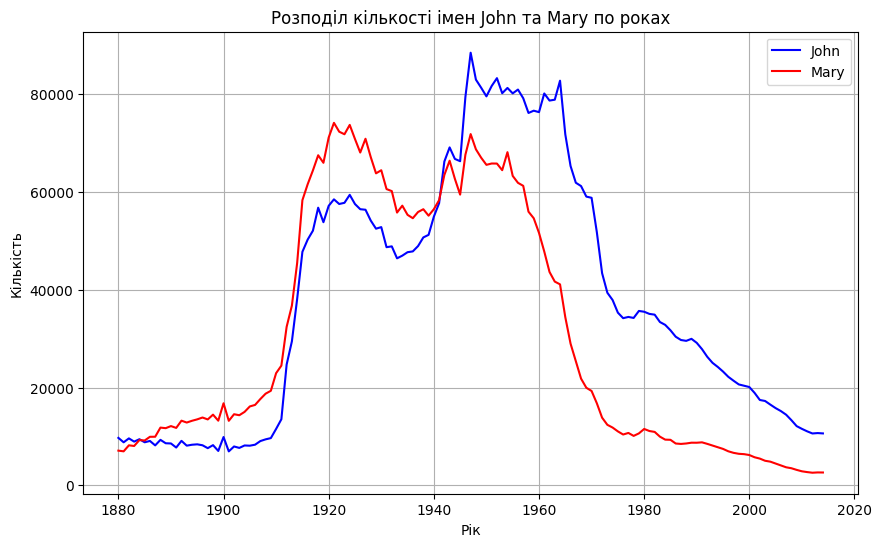

In [33]:
john_data = df[df['Name'] == 'John'].groupby('Year')['Count'].sum()
mary_data = df[df['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))

# Графік для John
plt.plot(john_data.index, john_data.values, label='John', color='blue')

# Графік для Mary
plt.plot(mary_data.index, mary_data.values, label='Mary', color='red')

plt.title('Розподіл кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')

plt.legend()

plt.grid(True)
plt.show()

26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

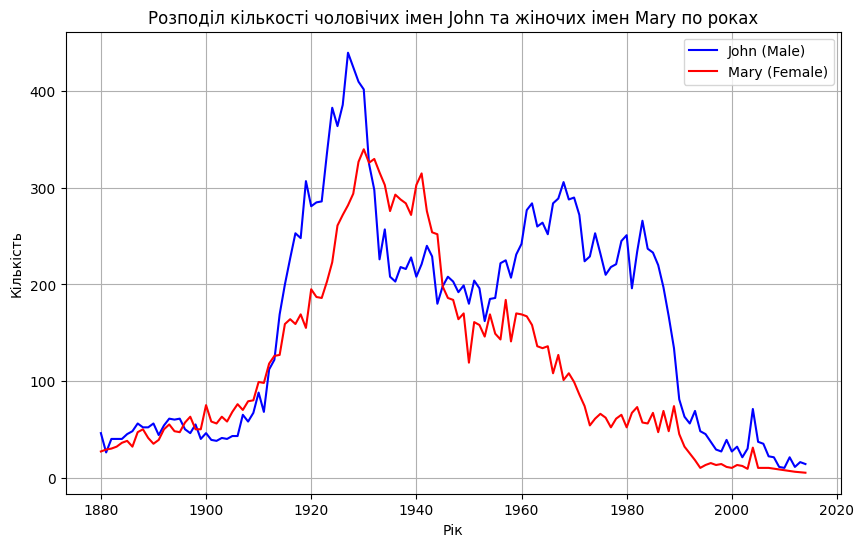

In [35]:
john_male_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_female_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))

# Графік для чоловічого імені John
plt.plot(john_male_data.index, john_male_data.values, label='John (Male)', color='blue')

# Графік для жіночого імені Mary
plt.plot(mary_female_data.index, mary_female_data.values, label='Mary (Female)', color='red')

plt.title('Розподіл кількості чоловічих імен John та жіночих імен Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')

plt.legend()

plt.grid(True)
plt.show()

27. Знайти найпопулярніші імена в кожному році.

In [36]:
most_popular_names_per_year = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()
most_popular_names_per_year = most_popular_names_per_year.loc[most_popular_names_per_year.groupby('Year')['Count'].idxmax()]

print(most_popular_names_per_year[['Year', 'Name', 'Count']])

         Year      Name  Count
955      1880      John   9701
2818     1881      John   8795
4735     1882      John   9597
6727     1883      John   8934
8775     1884      John   9428
...       ...       ...    ...
1521288  2010  Isabella  22913
1568092  2011    Sophia  21839
1599369  2012    Sophia  22285
1630271  2013    Sophia  21172
1643629  2014      Emma  20811

[135 rows x 3 columns]
